In [6]:
import pandas as pd
from rich import print
from os import listdir

In [40]:
xwalk = pd.read_csv("../extend_KORV/data/interim/cross_walk.csv")
klems_code = xwalk["code_klems"].values.tolist()
bea_code = xwalk["code_bea"].values.tolist()

In [65]:
xwalk

,Unnamed: 0,ind_desc,code_klems,code_bea,code_census
0,0,Farms,111CA,110c,10
1,1,"Forestry, fishing, and related activities",113FF,113f,"11,12,20,30,31,32,230"
2,2,Oil and gas extraction,211,2110,42
3,3,"Mining, except oil and gas",212,2120,"40,50,41"
4,4,Support activities for mining,213,2130,"882,890,891,892,893"
5,5,Utilities,22,2200,"450,451,452,470,471,472"
6,6,Construction,23,2300,60
7,7,Wood products,321,3210,"231,232,241"
8,8,Nonmetallic mineral products,327,3270,"250,251,252,261,262"
9,9,Primary metals,331,3310,"270,271,272,280"


In [7]:
# Define industry code
ind_ = "44RT"

In [8]:
# Read labor share and output data 
labor_share = pd.read_csv("/Users/mitchv34/my_work/field_paper_clean/extend_KORV/data/interim/labor_share.csv")
output = pd.read_csv("/Users/mitchv34/my_work/field_paper_clean/extend_KORV/data/interim/output.csv")

In [9]:
gdp_def = pd.read_csv("../extend_KORV/data/raw/gdpdef.csv")

gdp_def.value = gdp_def.value / 100
gdp_def.date = gdp_def.date.apply(lambda x : int(x[:4]))
gdp_def = gdp_def.loc[ gdp_def.date >= 1987 , :]
gdp_def = gdp_def.loc[ gdp_def.date <= 2018 , :]
gdp_def.date = gdp_def.date.apply(lambda x : str(x))
gdp_def.set_index("date", inplace=True)

In [37]:
# Select labor share data and output for the industry
labor_share_ind = labor_share.loc[labor_share["Production Account Codes"] == ind_]
output_ind = output.loc[output["Production Account Codes"] == ind_]

years = [y for y in labor_share_ind.columns if y.isdigit()]

labor_share_ind = labor_share_ind.T.loc[years]
output_ind = output_ind.T.loc[years]

labor_share_ind.rename(columns={labor_share_ind.columns[0] : "L_SHARE"}, inplace=True)
output_ind.rename(columns={output_ind.columns[0] : "OUTPUT"}, inplace=True)

labor_share_ind.plot()

<AxesSubplot:>

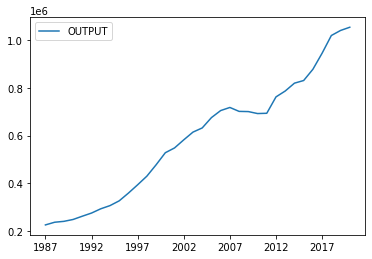

In [38]:
output_ind.plot()

In [12]:
# Merge both dataframes
merged = pd.merge(labor_share_ind, output_ind, left_index=True, right_index=True)

In [13]:
merged.OUTPUT = merged.OUTPUT.astype(float) /gdp_def.value

In [66]:
# Read Capital Data
for code in bea_code:
    code_list = code.split(",")
    capital_data = pd.DataFrame({   "YEAR" : map(str , range(1947, 2021)), 
                                    "K_STR" : [0]*len(range(1947, 2021)),
                                    "K_EQ" :[0]*len(range(1947, 2021)),
                                    "REL_P_EQ" : [0]*len(range(1947, 2021)),
    }).set_index("YEAR")
    for ind_ in code_list:
        capital_data_temp = pd.read_csv(f"../extend_KORV/data/interim/ind_capital/{ind_.strip()}.csv")
        capital_data_temp.YEAR = capital_data_temp.YEAR.astype(int).astype(str)
        capital_data_temp.set_index("YEAR", inplace=True)
        capital_data.K_STR += capital_data_temp.K_STR * 1000
        capital_data.K_EQ += capital_data_temp.K_EQ * 1000
        capital_data.REL_P_EQ += capital_data_temp.REL_P_EQ
    capital_data.REL_P_EQ /= len(code_list)

In [15]:
# Merge (again) both dataframes
merged = pd.merge(merged, capital_data, left_index=True, right_index=True)

In [16]:
merged

,L_SHARE,OUTPUT,K_STR,K_EQ,REL_P_EQ
1987,0.706442,9.022542e+05,9114.771027,231.059544,5.301190
1988,0.699294,9.085659e+05,9144.757159,252.753208,5.036527
1989,0.691283,9.238803e+05,9195.053548,274.176923,4.791311
1990,0.701435,9.258156e+05,9231.336370,289.692419,4.538831
1991,0.706475,9.072651e+05,9208.868513,304.972517,4.341755
1992,0.701109,9.363334e+05,9199.706388,329.806312,4.083997
1993,0.681344,9.863865e+05,9191.780609,359.411602,3.852716
1994,0.66855,1.053488e+06,9223.019549,391.557659,3.685468
1995,0.667188,1.094670e+06,9281.565223,430.295858,3.464342
1996,0.660535,1.127226e+06,9340.366863,472.288140,3.214990


In [59]:
for ind_ in klems_code:
    labor = pd.read_csv(f"../extend_KORV/data/interim/ind_labor/{ind_}.csv")
    labor.YEAR = labor.YEAR.astype(int).astype(str)
    labor.set_index("YEAR", inplace=True)

In [18]:
# Merge (again) both dataframes
merged = pd.merge(merged, labor, left_index=True, right_index=True)

In [19]:
merged.reset_index(inplace=True)
merged.rename(columns={"index": "YEAR"}, inplace=True)

In [20]:
merged.loc[:,["L_U", "L_S"]] = merged.loc[:,["L_U", "L_S"]] / 1000
merged.loc[:,["K_STR", "K_EQ"]] = merged.loc[:,["K_STR", "K_EQ"]] / 10
merged.loc[:, ["OUTPUT"]] = merged.loc[:, ["OUTPUT"]] / 1000
merged.loc[:, ["REL_P_EQ"]] = merged.loc[:, ["REL_P_EQ"]] / merged.loc[0, ["REL_P_EQ"]]

In [21]:
merged

,YEAR,L_SHARE,OUTPUT,K_STR,K_EQ,REL_P_EQ,L_U,L_S,W_U,W_S,SKILL_PREMIUM,LABOR_INPUT_RATIO
0,1987,0.706442,902.254228,911.477103,23.105954,1.0,14.610266,3.337800,8.397277,12.302153,1.465017,0.228456
1,1988,0.699294,908.565909,914.475716,25.275321,0.950075,14.249728,3.353475,8.532411,12.866514,1.507958,0.235336
2,1989,0.691283,923.880256,919.505355,27.417692,0.903818,14.840746,3.707276,8.959304,13.466853,1.503114,0.249804
3,1990,0.701435,925.815627,923.133637,28.969242,0.856191,15.100405,3.790796,9.113656,13.356351,1.465532,0.251039
4,1991,0.706475,907.265126,920.886851,30.497252,0.819015,14.923238,3.938348,9.356811,14.080144,1.504802,0.263907
5,1992,0.701109,936.333368,919.970639,32.980631,0.770393,15.416225,4.105644,9.895107,14.751898,1.490828,0.266320
6,1993,0.681344,986.386538,919.178061,35.941160,0.726764,15.300140,4.183968,9.851175,14.823556,1.504750,0.273459
7,1994,0.66855,1053.487909,922.301955,39.155766,0.695215,15.399471,4.057563,10.302004,15.236838,1.479017,0.263487
8,1995,0.667188,1094.670008,928.156522,43.029586,0.653503,15.242524,4.475893,10.523924,15.768431,1.498341,0.293645
9,1996,0.660535,1127.225739,934.036686,47.228814,0.606466,15.360230,4.284571,11.101562,17.000843,1.531392,0.278939


In [22]:
merged.to_csv("../extend_KORV/data/proc/ind/{}.csv".format(ind_), index=False)